<a href="https://colab.research.google.com/github/Angel353/CADII_Equipo1/blob/main/Airbnb_Bases/Seattle/Regresi%C3%B3n%20No%20Lineal/ModelosNoLineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install scipy

In [ ]:
%pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
# Cargamos librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score

In [ ]:
df = pd.read_csv("Seattle_Outliers_categorizacion.csv")
df.drop(["Unnamed: 0","price"], axis = 1, inplace = True)
df.head(6)

,last_scraped,source,host_name,host_response_time,host_verifications,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,...,hostAcceptanceCat,hostVerifCat,neighbourhood_Category_num,bedsCategory,reviewsMonthCat,reviewScoresCat,reviewLocationCat,reviewRatingCat,reviewCleanCat,reviewCommunicationCat
0,24/06/2024,city scrape,Joyce,within a few hours,"['email', 'phone']",Wallingford,Entire guesthouse,Entire home/apt,1 bath,"[""Keypad"", ""Refrigerator"", ""Patio or balcony"",...",...,(37 - 45%) Medio,(2) Verificación moderada,2,(0 - 1) Una cama,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
1,24/06/2024,city scrape,Angielena,within a few hours,"['email', 'phone']",Georgetown,Private room in rental unit,Private room,3 shared baths,"[""Rice maker"", ""Shared patio or balcony"", ""Ref...",...,(92 - 100%) Excelente,(2) Verificación moderada,4,(0 - 1) Una cama,(1) Reseña mensual mínima,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
2,24/06/2024,city scrape,Cassie,within a few hours,"['email', 'phone']",Fairmount Park,Entire home,Entire home/apt,1 bath,"[""Single level home"", ""Refrigerator"", ""Luggage...",...,(74 - 82%) Muy bueno,(2) Verificación moderada,4,(2) Pocas camas,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
3,24/06/2024,city scrape,Cassie,within a few hours,"['email', 'phone']",Fairmount Park,Entire guest suite,Entire home/apt,1 bath,"[""Single level home"", ""Refrigerator"", ""Luggage...",...,(74 - 82%) Muy bueno,(2) Verificación moderada,4,(2) Pocas camas,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
4,25/06/2024,previous scrape,Joyce,within a few hours,"['email', 'phone']",Wallingford,Entire rental unit,Entire home/apt,1 bath,"[""Smart lock"", ""Refrigerator"", ""Patio or balco...",...,(37 - 45%) Medio,(2) Verificación moderada,2,(2) Pocas camas,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(4) Satisfecho,(5) Muy satisfecho
5,24/06/2024,city scrape,Amanda,within an hour,"['email', 'phone']",Whittier Heights,Entire guest suite,Entire home/apt,1 bath,"[""Luggage dropoff allowed"", ""Refrigerator"", ""S...",...,(92 - 100%) Excelente,(2) Verificación moderada,3,(2) Pocas camas,(5 - 7) Buen número de reseñas mensuales,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho


In [ ]:
# Separamos los datos cuantitativos
df = df.select_dtypes(np.number)
df

,host_id,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,...,number_of_reviews,reviews_per_month,beds,amenities_num,room_type_num,neighbourhood_cleansed_num,host_response_time_num,bathroom_text_num,priceMex,neighbourhood_Category_num
0,14942,2009,90.0,44.0,0.0,4,1,1,47.654440,-122.336290,...,160.0,0.88,1.0,29.0,0,80,2,3,1936.04,2
1,30559,2009,98.0,98.0,1.0,10,1,1,47.550170,-122.319370,...,196.0,1.16,1.0,53.0,2,24,2,5,1486.26,4
2,31481,2009,100.0,80.0,1.0,2,1,1,47.554950,-122.386630,...,97.0,0.64,3.0,63.0,0,18,2,3,3696.08,4
3,31481,2009,100.0,80.0,1.0,2,1,1,47.556270,-122.386070,...,77.0,0.51,2.0,57.0,0,18,2,3,2444.50,4
4,14942,2009,90.0,44.0,0.0,4,1,1,47.656080,-122.336020,...,96.0,0.61,2.0,28.0,0,80,2,3,3265.85,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6437,398317720,2021,100.0,99.0,1.0,130,1,1,47.676760,-122.358820,...,0.0,1.78,6.0,45.0,0,57,3,3,9406.44,1
6438,184675574,2018,100.0,99.0,0.0,4,1,1,47.665714,-122.289243,...,0.0,1.78,1.0,17.0,2,10,3,5,1603.59,0
6439,584875397,2024,97.6,92.3,0.0,1,0,1,47.531331,-122.374214,...,0.0,1.78,2.0,37.0,0,67,3,3,4341.43,4
6440,581629893,2024,72.0,100.0,0.0,6,1,1,47.509680,-122.256950,...,0.0,1.78,1.0,47.0,2,62,3,3,782.24,4


In [ ]:
# Encontramos el valor absoluto de todas las correlaciones entre las variables
corrTabla = abs(df.corr())
corrTabla

,host_id,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,...,number_of_reviews,reviews_per_month,beds,amenities_num,room_type_num,neighbourhood_cleansed_num,host_response_time_num,bathroom_text_num,priceMex,neighbourhood_Category_num
host_id,1.000000,0.954387,0.049385,0.012107,0.127371,0.058246,0.137371,0.050371,0.002927,0.026251,...,0.219205,0.053301,0.020815,0.066329,0.110127,0.021313,0.073733,0.003423,0.073717,0.008578
host_since,0.954387,1.000000,0.043327,0.020743,0.113552,0.027297,0.127985,0.064659,0.013473,0.022215,...,0.217018,0.066474,0.027812,0.053316,0.094332,0.030486,0.105068,0.000433,0.083775,0.017008
host_response_rate,0.049385,0.043327,1.000000,0.437661,0.156150,0.028887,0.021783,0.045886,0.027398,0.011404,...,0.074067,0.099370,0.022503,0.112656,0.068885,0.043855,0.636511,0.063487,0.036631,0.043324
host_acceptance_rate,0.012107,0.020743,0.437661,1.000000,0.261290,0.072198,0.003592,0.017677,0.036170,0.040369,...,0.170676,0.241717,0.067684,0.176829,0.119630,0.049397,0.544187,0.063756,0.088435,0.068942
host_is_superhost,0.127371,0.113552,0.156150,0.261290,1.000000,0.263793,0.064192,0.027942,0.014449,0.052926,...,0.328791,0.310284,0.116018,0.309824,0.144550,0.018720,0.191077,0.061731,0.091542,0.065799
host_listings_count,0.058246,0.027297,0.028887,0.072198,0.263793,1.000000,0.027382,0.071979,0.023190,0.010311,...,0.191231,0.118346,0.109290,0.194806,0.102419,0.002576,0.091880,0.079172,0.021660,0.013666
host_has_profile_pic,0.137371,0.127985,0.021783,0.003592,0.064192,0.027382,1.000000,0.147539,0.045705,0.035703,...,0.046763,0.036597,0.016901,0.007338,0.002419,0.001580,0.010437,0.023672,0.009381,0.062499
host_identity_verified,0.050371,0.064659,0.045886,0.017677,0.027942,0.071979,0.147539,1.000000,0.006179,0.014951,...,0.010324,0.024433,0.001264,0.017944,0.035855,0.018822,0.042220,0.030096,0.031443,0.042032
latitude,0.002927,0.013473,0.027398,0.036170,0.014449,0.023190,0.045705,0.006179,1.000000,0.138489,...,0.021432,0.040106,0.010312,0.051603,0.010119,0.133969,0.064397,0.021852,0.018877,0.595841
longitude,0.026251,0.022215,0.011404,0.040369,0.052926,0.010311,0.035703,0.014951,0.138489,1.000000,...,0.037493,0.067433,0.012173,0.079128,0.094204,0.107919,0.034560,0.087041,0.034135,0.009448


## Modelo 1: host_response_rate

In [ ]:
# Filtrando las correlaciones fuertes
hostModel = abs(df.corr()['host_response_rate'])
hostModel = hostModel[hostModel.abs() > 0.2].sort_values(ascending=False).to_frame()
hostModel

,host_response_rate
host_response_rate,1.000000
host_response_time_num,0.636511
host_acceptance_rate,0.437661


In [ ]:
# Declaramos las variables dependientes e independientes para la regresión No Lineal
Vars_Indep = df [['host_response_time_num']]
Var_Dep = df ['host_response_rate']

In [ ]:
# Redefinimos las variables
x = Vars_Indep
y = Var_Dep

In [ ]:
def func1(x, a, b, c):   # Cuadrática
    return a * x**2 + b * x + c

In [ ]:
# Ajustamos los parámetros de la función curve_fit
parametros, covs = curve_fit(func1, df['host_response_time_num'], df['host_response_rate'])

In [ ]:
# Obtenemos los coeficientes del modelo de regresión no lineal
parametros  # Imprime a, b, c

array([-14.87573686,  71.10866601,  19.6358217 ])

In [ ]:
# Predicciones
y_pred = func1(x, *parametros)  # El * es para asegurarme que me de todas las posiciones

In [ ]:
# Calculamos las predicciones y reestructuramos el vector de predicciones
y_pred

,host_response_time_num
0,102.350206
1,102.350206
2,102.350206
3,102.350206
4,102.350206
...,...
6437,99.080188
6438,99.080188
6439,99.080188
6440,99.080188


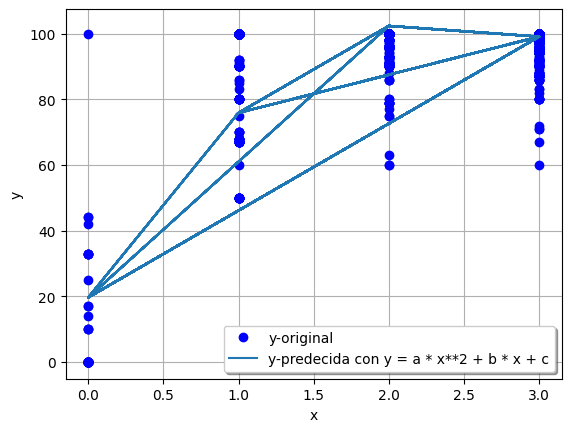

In [ ]:
# Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label = 'y-original')
plt.plot(x, y_pred, label = 'y-predecida con y = a * x**2 + b * x + c')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc = 'best', fancybox = True, shadow = True)
plt.grid(True)
plt.show()

In [ ]:
# Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = abs(r2_score(y, y_pred))
R2_Modelo1

0.7607859301857931

In [ ]:
# Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo1)
R

0.872230434108896

## Modelo 2:

In [ ]:
def func2(x, a):  # Inversa
    return 1 / a * x

In [ ]:
# Ajustamos los parámetros de la función curve_fit
parametros2, covs2 = curve_fit(func2, df['host_response_time_num'], df['host_response_rate'])

In [ ]:
# Obtenemos los coeficientes del modelo de regresión no lineal
parametros2  # Imprime a, b, c

array([0.02937478])

In [ ]:
# Predicciones
y_pred2 = func2(x, *parametros2)  # El * es para asegurarme que me de todas las posiciones

In [ ]:
# Calculamos las predicciones y reestructuramos el vector de predicciones
y_pred2

,host_response_time_num
0,68.085623
1,68.085623
2,68.085623
3,68.085623
4,68.085623
...,...
6437,102.128434
6438,102.128434
6439,102.128434
6440,102.128434


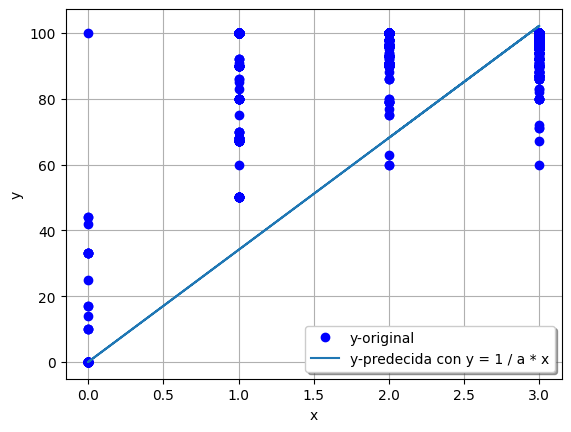

In [ ]:
# Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label = 'y-original')
plt.plot(x, y_pred2, label = 'y-predecida con y = 1 / a * x')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc = 'best', fancybox = True, shadow = True)
plt.grid(True)
plt.show()

In [ ]:
# Calculamos el coeficiente de determinación del modelo
R2_Modelo2 = abs(r2_score(y, y_pred2))
R2_Modelo2

0.7365070848143469

In [ ]:
# Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo2)
R

0.8581999095865409

## Modelo 3: host_acceptance_rate

In [ ]:
# Filtrando las correlaciones fuertes
AcceptanceModel = abs(df.corr()['host_acceptance_rate'])
AcceptanceModel = AcceptanceModel[AcceptanceModel.abs() > 0.2].sort_values(ascending=False).to_frame()
AcceptanceModel

,host_acceptance_rate
host_acceptance_rate,1.000000
host_response_time_num,0.544187
host_response_rate,0.437661
minimum_nights_avg_ntm,0.299935
host_is_superhost,0.261290
number_of_reviews_ltm,0.256865
reviews_per_month,0.241717
number_of_reviews_l30d,0.217254
instant_bookable,0.200409


In [ ]:
# Declaramos las variables dependientes e independientes para la regresión No Lineal
Vars_Indep = df [['host_response_time_num']]
Var_Dep = df ['host_acceptance_rate']

In [ ]:
# Redefinimos las variables
x = Vars_Indep
y = Var_Dep

In [ ]:
def func3(x, a):  # Cuadrática inversa
    return 1 / a * x**2

In [ ]:
# Ajustamos los parámetros de la función curve_fit
parametros3, covs3 = curve_fit(func3, df['host_response_time_num'], df['host_acceptance_rate'])

In [ ]:
# Obtenemos los coeficientes del modelo de regresión no lineal
parametros3  # Imprime a, b, c

array([0.09233763])

In [ ]:
# Predicciones
y_pred3 = func3(x, *parametros3)  # El * es para asegurarme que me de todas las posiciones

In [ ]:
# Calculamos las predicciones y reestructuramos el vector de predicciones
y_pred3

,host_response_time_num
0,43.319284
1,43.319284
2,43.319284
3,43.319284
4,43.319284
...,...
6437,97.468389
6438,97.468389
6439,97.468389
6440,97.468389


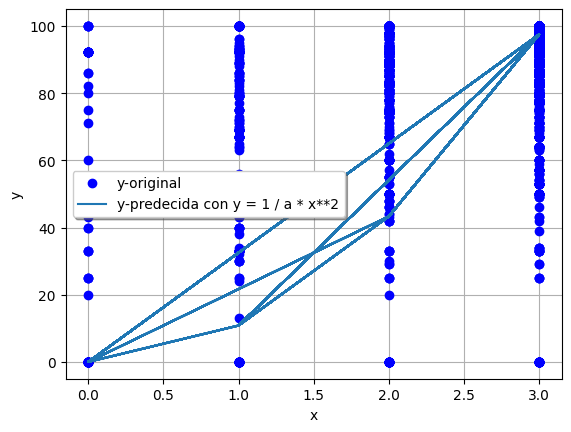

In [ ]:
# Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label = 'y-original')
plt.plot(x, y_pred3, label = 'y-predecida con y = 1 / a * x**2')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc = 'best', fancybox = True, shadow = True)
plt.grid(True)
plt.show()

In [ ]:
# Calculamos el coeficiente de determinación del modelo
R2_Modelo3 = abs(r2_score(y, y_pred3))
R2_Modelo3

0.5955243820461698

In [ ]:
# Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo3)
R

0.7717022625638529

## Modelo 4:

In [ ]:
def func4(x, a, b, c):   # Cuadrática
    return a * x**2 + b * x + c

In [ ]:
# Ajustamos los parámetros de la función curve_fit
parametros4, covs4 = curve_fit(func4, df['host_response_time_num'], df['host_acceptance_rate'])

In [ ]:
# Obtenemos los coeficientes del modelo de regresión no lineal
parametros4  # Imprime a, b, c

array([-2.33230371, 25.73621274, 39.17769405])

In [ ]:
# Predicciones
y_pred4 = func4(x, *parametros4)  # El * es para asegurarme que me de todas las posiciones

In [ ]:
# Calculamos las predicciones y reestructuramos el vector de predicciones
y_pred4

,host_response_time_num
0,81.320905
1,81.320905
2,81.320905
3,81.320905
4,81.320905
...,...
6437,95.395599
6438,95.395599
6439,95.395599
6440,95.395599


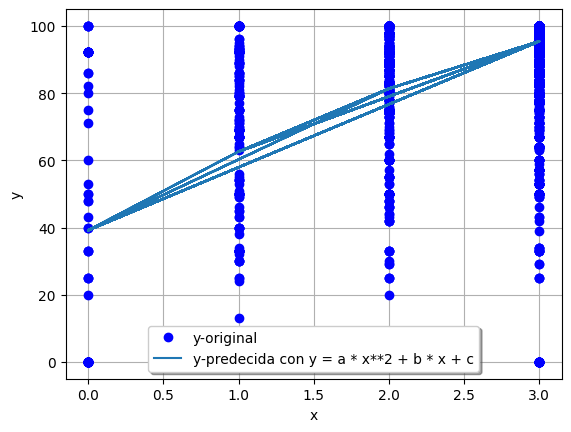

In [ ]:
# Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label = 'y-original')
plt.plot(x, y_pred4, label = 'y-predecida con y = a * x**2 + b * x + c')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc = 'best', fancybox = True, shadow = True)
plt.grid(True)
plt.show()

In [ ]:
# Calculamos el coeficiente de determinación del modelo
R2_Modelo4 = abs(r2_score(y, y_pred4))
R2_Modelo4

0.29997162341262174

In [ ]:
# Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo4)
R

0.5476966527308905

## Modelo 5: host_total_listings_count

In [ ]:
# Filtrando las correlaciones fuertes
hostModel2 = abs(df.corr()['host_total_listings_count'])
hostModel2 = hostModel2[hostModel2.abs() > 0.2].sort_values(ascending=False).to_frame()
hostModel2

,host_total_listings_count
host_total_listings_count,1.000000
instant_bookable,0.215839


In [ ]:
# Declaramos las variables dependientes e independientes para la regresión No Lineal
Vars_Indep = df [['host_is_superhost']]
Var_Dep = df ['host_total_listings_count']

In [ ]:
# Redefinimos las variables
x = Vars_Indep
y = Var_Dep

In [ ]:
def func5(x, a):  # Cuadrática inversa
    return 1 / a * x**2

In [ ]:
# Ajustamos los parámetros de la función curve_fit
parametros5, covs5 = curve_fit(func5, df['host_is_superhost'], df['host_total_listings_count'])

In [ ]:
# Obtenemos los coeficientes del modelo de regresión no lineal
parametros5  # Imprime a, b, c

array([0.07526617])

In [ ]:
# Predicciones
y_pred5 = func5(x, *parametros5)  # El * es para asegurarme que me de todas las posiciones

In [ ]:
# Calculamos las predicciones y reestructuramos el vector de predicciones
y_pred5

,host_is_superhost
0,0.000000
1,13.286181
2,13.286181
3,13.286181
4,0.000000
...,...
6437,13.286181
6438,0.000000
6439,0.000000
6440,0.000000


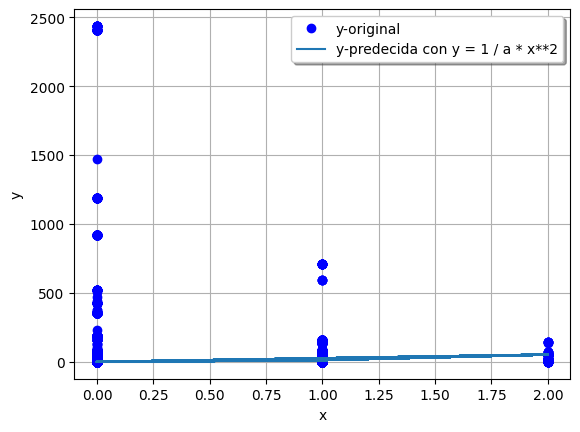

In [ ]:
# Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label = 'y-original')
plt.plot(x, y_pred5, label = 'y-predecida con y = 1 / a * x**2')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc = 'best', fancybox = True, shadow = True)
plt.grid(True)
plt.show()

In [ ]:
# Calculamos el coeficiente de determinación del modelo
R2_Modelo5 = abs(r2_score(y, y_pred5))
R2_Modelo5

0.059880985359510364

In [ ]:
# Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo5)
R

0.24470591606969858

## Modelo 6:

In [ ]:
def func6(x, a):  # Función inversa
    return 1 / a * x

In [ ]:
# Ajustamos los parámetros de la función curve_fit
parametros6, covs6 = curve_fit(func6, df['host_is_superhost'], df['host_total_listings_count'])

In [ ]:
# Obtenemos los coeficientes del modelo de regresión no lineal
parametros6  # Imprime a, b, c

array([0.05971768])

In [ ]:
# Predicciones
y_pred6 = func6(x, *parametros6)  # El * es para asegurarme que me de todas las posiciones

In [ ]:
# Calculamos las predicciones y reestructuramos el vector de predicciones
y_pred6

,host_is_superhost
0,0.00000
1,16.74546
2,16.74546
3,16.74546
4,0.00000
...,...
6437,16.74546
6438,0.00000
6439,0.00000
6440,0.00000


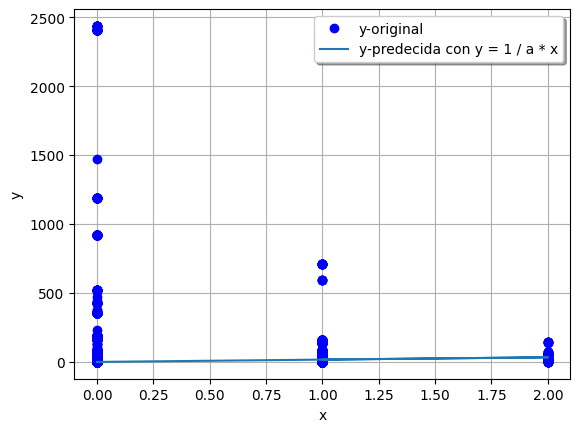

In [ ]:
# Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label = 'y-original')
plt.plot(x, y_pred6, label = 'y-predecida con y = 1 / a * x')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc = 'best', fancybox = True, shadow = True)
plt.grid(True)
plt.show()

In [ ]:
# Calculamos el coeficiente de determinación del modelo
R2_Modelo6 = abs(r2_score(y, y_pred6))
R2_Modelo6

0.05957565555629207

In [ ]:
# Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo6)
R

0.24408124785876542

## Modelo 7: accommodates

In [ ]:
# Filtrando las correlaciones fuertes
accomodatesModel = abs(df.corr()['accommodates'])
accomodatesModel = accomodatesModel[accomodatesModel.abs() > 0.30].sort_values(ascending=False).to_frame()
accomodatesModel

,accommodates
accommodates,1.000000
bedrooms,0.748922
beds,0.743644
priceMex,0.624201
bathrooms,0.500733
room_type_num,0.372912
amenities_num,0.322396


In [ ]:
# Declaramos las variables dependientes e independientes para la regresión No Lineal
Vars_Indep = df [['bedrooms']]
Var_Dep = df ['accommodates']

In [ ]:
# Redefinimos las variables
x = Vars_Indep
y = Var_Dep

In [ ]:
def func7(x, a):  # Cuadrática inversa
    return 1 / a * x**2

In [ ]:
# Ajustamos los parámetros de la función curve_fit
parametros7, covs7 = curve_fit(func7, df['bedrooms'], df['accommodates'])

In [ ]:
# Obtenemos los coeficientes del modelo de regresión no lineal
parametros7  # Imprime a, b, c

array([2.4710948])

In [ ]:
# Predicciones
y_pred7 = func7(x, *parametros7)  # El * es para asegurarme que me de todas las posiciones

In [ ]:
# Calculamos las predicciones y reestructuramos el vector de predicciones
y_pred7

,bedrooms
0,0.404679
1,0.404679
2,1.618716
3,1.618716
4,0.404679
...,...
6437,14.568441
6438,0.404679
6439,1.618716
6440,0.404679


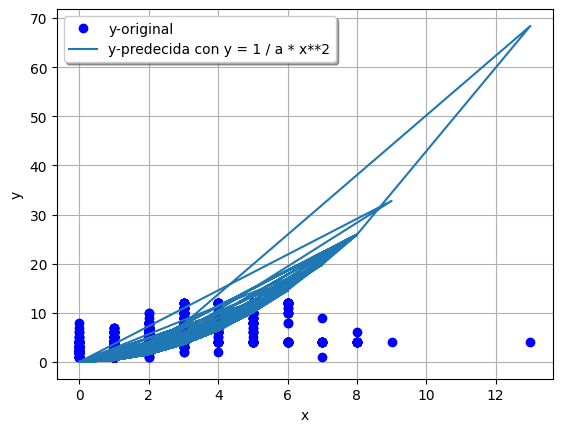

In [ ]:
# Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label = 'y-original')
plt.plot(x, y_pred7, label = 'y-predecida con y = 1 / a * x**2')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc = 'best', fancybox = True, shadow = True)
plt.grid(True)
plt.show()

In [ ]:
# Calculamos el coeficiente de determinación del modelo
R2_Modelo7 = abs(r2_score(y, y_pred7))
R2_Modelo7

0.9825881137381476

In [ ]:
# Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo7)
R

0.9912558265847156

## Modelo 8:

In [ ]:
def func8(x, a, b, c):   # Cuadrática
    return a * x**2 + b * x + c

In [ ]:
# Ajustamos los parámetros de la función curve_fit
parametros8, covs8 = curve_fit(func8, df['bedrooms'], df['accommodates'])

In [ ]:
# Obtenemos los coeficientes del modelo de regresión no lineal
parametros8  # Imprime a, b, c

array([-0.15551844,  2.2241627 ,  0.89980114])

In [ ]:
# Predicciones
y_pred8 = func8(x, *parametros8)  # El * es para asegurarme que me de todas las posiciones

In [ ]:
# Calculamos las predicciones y reestructuramos el vector de predicciones
y_pred8

,bedrooms
0,2.968445
1,2.968445
2,4.726053
3,4.726053
4,2.968445
...,...
6437,8.646114
6438,2.968445
6439,4.726053
6440,2.968445


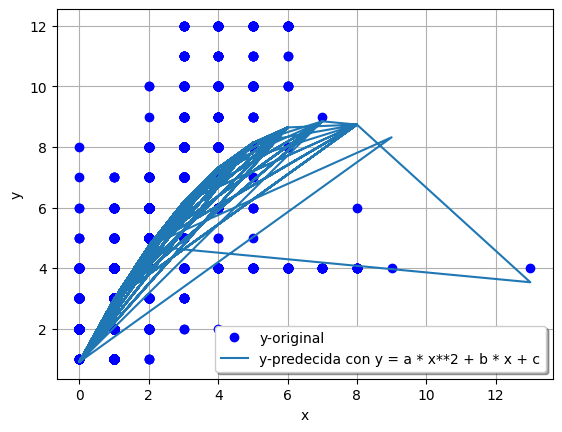

In [ ]:
# Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label = 'y-original')
plt.plot(x, y_pred8, label = 'y-predecida con y = a * x**2 + b * x + c')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc = 'best', fancybox = True, shadow = True)
plt.grid(True)
plt.show()

In [ ]:
# Calculamos el coeficiente de determinación del modelo
R2_Modelo8 = abs(r2_score(y, y_pred8))
R2_Modelo8

0.5981784450199177

In [ ]:
# Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo8)
R

0.773419966783841

## Modelo 9: reviews_per_month

In [ ]:
# Filtrando las correlaciones fuertes
reviewsMonthModel = abs(df.corr()['reviews_per_month'])
reviewsMonthModel = reviewsMonthModel[reviewsMonthModel.abs() > 0.20].sort_values(ascending=False).to_frame()
reviewsMonthModel

,reviews_per_month
reviews_per_month,1.000000
number_of_reviews_ltm,0.772211
number_of_reviews_l30d,0.610060
number_of_reviews,0.477304
minimum_nights_avg_ntm,0.412806
host_is_superhost,0.310284
host_acceptance_rate,0.241717
review_scores_value,0.239557
host_response_time_num,0.228831
review_scores_rating,0.209489


In [ ]:
# Declaramos las variables dependientes e independientes para la regresión No Lineal
Vars_Indep = df [['number_of_reviews_ltm']]
Var_Dep = df ['reviews_per_month']

In [ ]:
# Redefinimos las variables
x = Vars_Indep
y = Var_Dep

In [ ]:
def func9(x, a, b, c):   # Cuadrática
    return a * x**2 + b * x + c

In [ ]:
# Ajustamos los parámetros de la función curve_fit
parametros9, covs9 = curve_fit(func9, df['number_of_reviews_ltm'], df['reviews_per_month'])

In [ ]:
# Obtenemos los coeficientes del modelo de regresión no lineal
parametros9  # Imprime a, b, c

array([-2.97022301e-04,  8.19440047e-02,  8.54492098e-01])

In [ ]:
# Predicciones
y_pred9 = func9(x, *parametros9)  # El * es para asegurarme que me de todas las posiciones

In [ ]:
# Calculamos las predicciones y reestructuramos el vector de predicciones
y_pred9

,number_of_reviews_ltm
0,0.936139
1,2.016822
2,2.582079
3,1.017192
4,0.854492
...,...
6437,0.854492
6438,0.854492
6439,0.854492
6440,0.854492


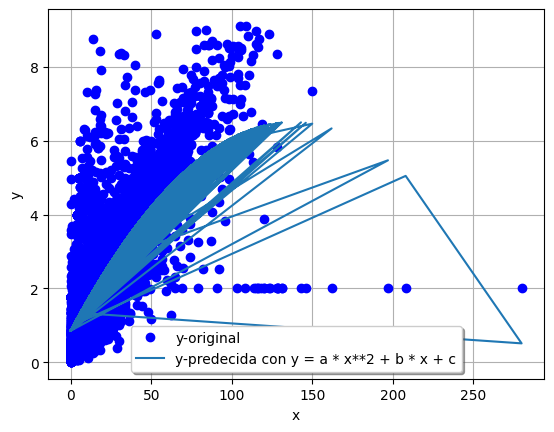

In [ ]:
# Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label = 'y-original')
plt.plot(x, y_pred9, label = 'y-predecida con y = a * x**2 + b * x + c')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc = 'best', fancybox = True, shadow = True)
plt.grid(True)
plt.show()

In [ ]:
# Calculamos el coeficiente de determinación del modelo
R2_Modelo9 = abs(r2_score(y, y_pred9))
R2_Modelo9

0.6376284739605382

In [ ]:
# Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo9)
R

0.7985164205954304

## Modelo 10:

In [ ]:
def func10(x, a):   # Cuadrática inversa
    return 1 / a * x**2

In [ ]:
# Ajustamos los parámetros de la función curve_fit
parametros10, covs10 = curve_fit(func10, df['number_of_reviews_ltm'], df['reviews_per_month'])

In [ ]:
# Obtenemos los coeficientes del modelo de regresión no lineal
parametros10  # Imprime a, b, c

array([1438.73572613])

In [ ]:
# Predicciones
y_pred10 = func10(x, *parametros10)  # El * es para asegurarme que me de todas las posiciones

In [ ]:
# Calculamos las predicciones y reestructuramos el vector de predicciones
y_pred10

,number_of_reviews_ltm
0,0.000695
1,0.156387
2,0.367684
3,0.002780
4,0.000000
...,...
6437,0.000000
6438,0.000000
6439,0.000000
6440,0.000000


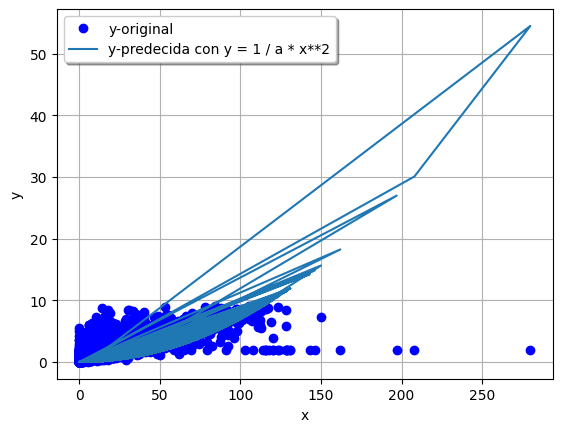

In [ ]:
# Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label = 'y-original')
plt.plot(x, y_pred10, label = 'y-predecida con y = 1 / a * x**2')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc = 'best', fancybox = True, shadow = True)
plt.grid(True)
plt.show()

In [ ]:
# Calculamos el coeficiente de determinación del modelo
R2_Modelo10 = abs(r2_score(y, y_pred10))
R2_Modelo10

0.6288175440200672

In [ ]:
# Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo10)
R

0.792980166221115

## Modelo 11: price

In [ ]:
# Filtrando las correlaciones fuertes
PriceModel = abs(df.corr()['priceMex'])
PriceModel = PriceModel[PriceModel.abs() > 0.20].sort_values(ascending=False).to_frame()
PriceModel

,priceMex
priceMex,1.000000
bedrooms,0.625899
accommodates,0.624201
beds,0.514203
bathrooms,0.506989
room_type_num,0.325673
amenities_num,0.297398
bathroom_text_num,0.261436


In [ ]:
# Declaramos las variables dependientes e independientes para la regresión No Lineal
Vars_Indep = df [['bedrooms']]
Var_Dep = df ['priceMex']

In [ ]:
# Redefinimos las variables
x = Vars_Indep
y = Var_Dep

In [ ]:
def func11(x, a):  # Cuadrática inversa
    return 1 / a * x**2

In [ ]:
# Ajustamos los parámetros de la función curve_fit
parametros11, covs11 = curve_fit(func11, df['bedrooms'], df['priceMex'])

In [ ]:
# Obtenemos los coeficientes del modelo de regresión no lineal
parametros11  # Imprime a, b, c

array([0.00255683])

In [ ]:
# Predicciones
y_pred11 = func11(x, *parametros11)  # El * es para asegurarme que me de todas las posiciones

In [ ]:
# Calculamos las predicciones y reestructuramos el vector de predicciones
y_pred11

,bedrooms
0,391.109837
1,391.109837
2,1564.439350
3,1564.439350
4,391.109837
...,...
6437,14079.954146
6438,391.109837
6439,1564.439350
6440,391.109837


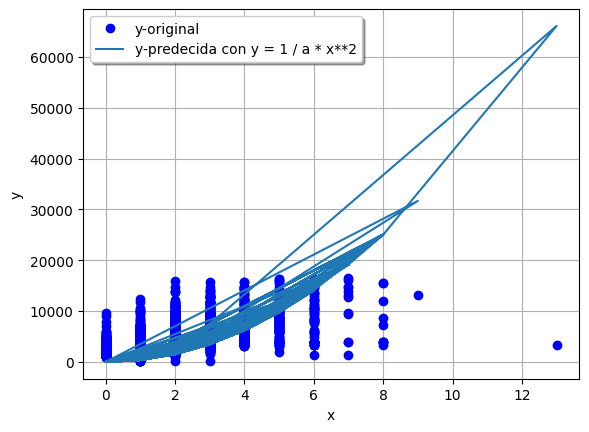

In [ ]:
# Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label = 'y-original')
plt.plot(x, y_pred11, label = 'y-predecida con y = 1 / a * x**2')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc = 'best', fancybox = True, shadow = True)
plt.grid(True)
plt.show()

In [ ]:
# Calculamos el coeficiente de determinación del modelo
R2_Modelo11 = abs(r2_score(y, y_pred11))
R2_Modelo11

0.9429656851694457

In [ ]:
# Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo11)
R

0.9710642023931506

## Modelo 12:

In [ ]:
def func12(x, a, b, c):  # Cuadrática
    return a * x**2 + b * x + c

In [ ]:
# Ajustamos los parámetros de la función curve_fit
parametros12, covs12 = curve_fit(func12, df['bedrooms'], df['priceMex'])

In [ ]:
# Obtenemos los coeficientes del modelo de regresión no lineal
parametros12  # Imprime a, b, c

/usr/local/lib/python3.10/dist-packages/IPython/core/displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


array([ -34.70765865, 1400.05153931, 1678.56683242])

In [ ]:
# Predicciones
y_pred12 = func12(x, *parametros12)  # El * es para asegurarme que me de todas las posiciones

In [ ]:
# Calculamos las predicciones y reestructuramos el vector de predicciones
y_pred12

,bedrooms
0,3043.910713
1,3043.910713
2,4339.839276
3,4339.839276
4,3043.910713
...,...
6437,8829.400357
6438,3043.910713
6439,4339.839276
6440,3043.910713


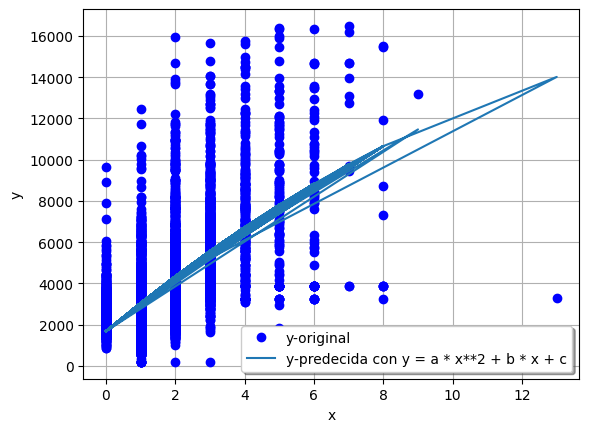

In [ ]:
# Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label = 'y-original')
plt.plot(x, y_pred12, label = 'y-predecida con y = a * x**2 + b * x + c')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc = 'best', fancybox = True, shadow = True)
plt.grid(True)
plt.show()

In [ ]:
# Calculamos el coeficiente de determinación del modelo
R2_Modelo12 = abs(r2_score(y, y_pred12))
R2_Modelo12

0.3935115691764214

In [ ]:
# Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo12)
R

0.6273050049030546